# Getting Started

In [1]:
# import sys
import csv
import pandas as pd

DEBUGGING = False
DATA_DIR  = '../data/'
DATA_FILE = 'house-prices.csv'


#--
# MAIN
#--

#-get data from a file
try:
    df = pd.read_csv( DATA_DIR + DATA_FILE, na_filter=False )
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()
#-get and size of raw data set
N = len( df.columns )
M = len( df.values )

#-print columns
if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = ' + str( N ))
    print('number of instances = ' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))
print(df.values)
print(df["Price"][3])
df.values[3][1]

[[1 114300 1790 ... 2 'No' 'East']
 [2 114200 2030 ... 3 'No' 'East']
 [3 114800 1740 ... 1 'No' 'East']
 ...
 [126 113500 2070 ... 2 'No' 'North']
 [127 149900 2020 ... 1 'No' 'West']
 [128 124600 2250 ... 4 'No' 'North']]
94700


94700

# Build a Distance Matrix

In [2]:
import sys
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

def dist_square( v0, v1 ):
    d = math.pow(v0-v1,2)
    return d

def dist_nominal( v0, v1 ):
    if ( v0 == v1 ):
        d = 0.0
    else:
        d = 1.0
    return d

def dist_instance_euclidean( df, X0, X1 ):
    N = len(df.columns)
    d = 0.0
    for i in range(1,N):
        if(df.dtypes[i] == 'object'):
            d += dist_nominal(df.values[X0][i],df.values[X1][i])
        else:
            d += dist_square(df.values[X0][i],df.values[X1][i])
    d = math.sqrt( d )
    return d

def dist_instance_manhattan(df,X0,X1):
    N = len(df.columns)
    d= 0.0
    for i in range(1,N):
        if(df.dtypes[i] == 'object'):
            d += dist_nominal(df.values[X0][i],df.values[X1][i])
        else:
            d += abs(df.values[X0][i] - df.values[X1][i])
    return d

In [3]:
#-compute distances between instances
dist_mesh_euclidean = np.zeros((M,M))
dist_mesh_manhattan = np.zeros((M,M))
for i in range(M):
    for j in range(i+1,M):
        dist_mesh_euclidean[i][j] = dist_instance_euclidean(df,i,j)
        dist_mesh_euclidean[j][i] = dist_mesh_euclidean[i][j] 
        dist_mesh_manhattan[i][j] = dist_instance_manhattan(df,i,j)
        dist_mesh_manhattan[j][i] = dist_mesh_manhattan[i][j]
print('Euclidean: mean distance = {} ({}), minimum distance = {}, maximum distance = {}'.format( np.mean( dist_mesh_euclidean ), np.std( dist_mesh_euclidean ), np.min( dist_mesh_euclidean ), np.max( dist_mesh_euclidean )))
print('Manhattan: mean distance = {} ({}), minimum distance = {}, maximum distance = {}'.format( np.mean( dist_mesh_manhattan ), np.std( dist_mesh_manhattan ), np.min( dist_mesh_manhattan ), np.max( dist_mesh_manhattan )))

Euclidean: mean distance = 30055.349130814982 (23007.526884197912), minimum distance = 0.0, maximum distance = 142102.4827615619
Manhattan: mean distance = 30291.340942382812 (23057.33673526354), minimum distance = 0.0, maximum distance = 142945.0


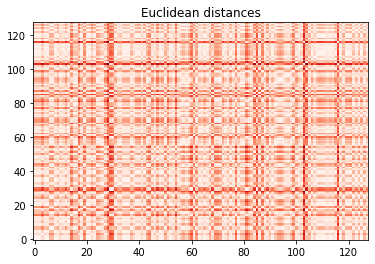

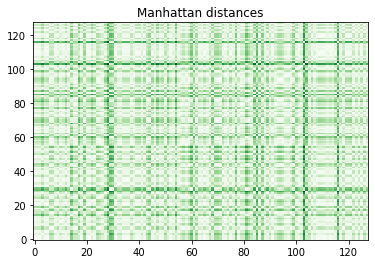

In [4]:
x0_range = np.arange(M)
x1_range = np.arange(M)
x0_mesh, x1_mesh = np.meshgrid( x0_range, x1_range )

plt.figure()
plt.set_cmap( 'Reds' )
plt.pcolormesh( x0_mesh, x1_mesh, dist_mesh_euclidean, shading='auto' )
plt.title( 'Euclidean distances' )

plt.show()
plt.close()

x0 = np.arange(M)
x1 = np.arange(M)
x0_mesh, x1_mesh = np.meshgrid(x0_range,x1_range)

plt.figure()
plt.set_cmap("Greens")
plt.pcolormesh(x0_mesh,x1_mesh,dist_mesh_manhattan,shading="auto")
plt.title("Manhattan distances")
plt.show()
plt.close()

# Build an Instance-Based Model

In [24]:
import sys
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

def dist_square( v0, v1 ):
    d = math.pow((v0-v1),2)
    return d

def dist_nominal( v0, v1 ):
    d = 0.0
    if(v0 == v1):
        d = 1.0
    else:
        d = 0.0
    return d

def dist_instance_euclidean(df0,X0, df):
    N = len(df0.columns)
    d= 0.0
    for i in range(2,N):
        if(df0.dtypes[i] == 'object'):
            d += dist_nominal(df0[df0.columns[i]][X0],df[df0.columns[i]][0])
        else:
            d += dist_square(df0[df0.columns[i]][X0],df[df0.columns[i]][0])
    d = math.sqrt( d )
    return d

def dist_instance_manhattan(df0,X0,df):
    N = len(df0.columns)
    d = 0.0
    for i in range(2,N):
        if(df0.dtypes[i] == 'object'):
            d += dist_nominal(df0[df0.columns[i]][X0],df[df0.columns[i]][0])
        else:
            d += abs(df0[df0.columns[i]][X0] - df[df0.columns[i]][0])     
    return d 

X = df.values   
M = len(X)
#number of neighbours
K = 5

Home = {'HomeID': [-999],"Price":[-999],'SqFt':[2050],"Bedrooms":[2],"Bathrooms":[1],
        "Offers" :[2],"Brick":['No'],'Neighborhood':['East']}

df_test = pd.DataFrame.from_dict(Home)
dist_euclidean = np.zeros(M)

# for euclidean
#look for the neighbour
for i in range(M):
    dist_euclidean[i] = dist_instance_euclidean( df, i,df_test )

sorted_dist = np.argsort( dist_euclidean )   

# get the total and avg price 
prices = 0.0
for i in range(K):
    prices += df["Price"][sorted_dist[i]]
prices /= K
print('average price = $' + str( prices ))

#for manhattan
#look for the neighbour
dist_manhattan = np.zeros(M)

for i in range(M):
    dist_manhattan[i] = dist_instance_manhattan(df,i,df_test)
sorted_dist1 = np.argsort(dist_manhattan)

#get the total and avg price  
price = 0.0
for i in range(K):
    price += df["Price"][sorted_dist1[i]]
price /= K
print('average price = ${}' .format(price) )    


    

average price = $134220.0
average price = $146680.0


# Numeric Variation

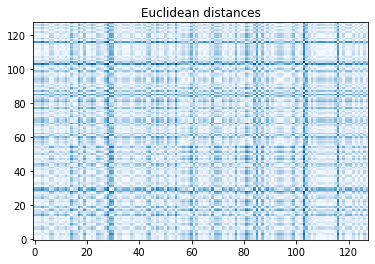

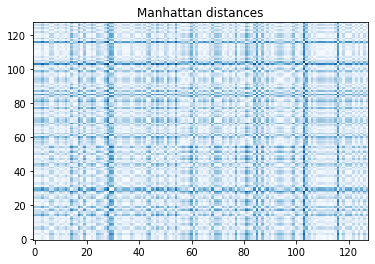

In [39]:
import sys
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


DEBUGGING = False
DATA_DIR  = '../data/'
DATA_FILE = 'house-prices.csv'
PLOTS_DIR = '../plots/'

ENCODE_BRICK = { 'No' : 0 , 'Yes' : 1 }
ENCODE_HOOD  = { 'East' : 0, 'North' : 90, 'West' : 180, 'South' : 270 }

Home = {'HomeID': [-999],"Price":[-999],'SqFt':[2050],"Bedrooms":[2],"Bathrooms":[1],
        "Offers" :[2],"Brick":['No'],'Neighborhood':['East']}
K = 5

def dist_square( v0, v1 ):
    d = math.pow((v0-v1),2)
    return d

def dist_instance_euclidean(X0,X1):
    N = len(df.columns)
    d= 0.0
    for i in range(1,N):
        d += dist_square(X0[i],X1[i])
    d = math.sqrt( d )
    return d

def dist_instance_manhattan(X0,X1):
    N = len(df.columns)
    d = 0.0
    for i in range(1,N):
        d += abs(X0[i] - X1[i])     
    return d 


M = len(df.values)
N = len(df.columns)

#encode the attr
X = np.zeros((M,N))

for i in range(M):
    for j in range(N):
        if(df.columns[j] == "Brick"):
            X[i][j] = ENCODE_BRICK[df[df.columns[j]][i]]
        elif(df.columns[j] == 'Neighborhood'):
            X[i][j] = ENCODE_HOOD[df.values[i][j]]
        else:
            X[i][j] = df.values[i][j]
#compute the distance matrix
dist_mesh_euclidean = np.zeros((M,M))
dist_mesh_manhattan = np.zeros((M,M))
for i in range(M):
    for j in range(i+1,M):
        dist_mesh_euclidean[i][j] = dist_instance_euclidean(X[i],X[j])
        dist_mesh_euclidean[j][i] = dist_mesh_euclidean[i][j]
        dist_mesh_manhattan[i][j] = dist_instance_manhattan(X[i],X[j])
        dist_mesh_manhattan[j][i] = dist_mesh_manhattan[i][j]
# build the pcolormesh for the euclidean
X0_range = np.arange(M)
X1_range = np.arange(M)
X0_mesh, X1_mesh = np.meshgrid(X0_range,X1_range)

plt.figure()
plt.set_cmap("Blues")
plt.pcolormesh(X0_mesh, X1_mesh,dist_mesh_euclidean,shading="auto")
plt.title("Euclidean distances")
plt.show()
plt.close()
# build the pcolormesh for the manhattan
X0_range = np.arange(M)
X1_range = np.arange(M)
X0_mesh, X1_mesh = np.meshgrid(X0_range,X1_range)

plt.figure()
plt.set_cmap("Blues")
plt.pcolormesh(X0_mesh, X1_mesh,dist_mesh_euclidean,shading="auto")
plt.title("Manhattan distances")
plt.show()
plt.close()
# #compute the K neighbour
# dist_euclidean = np.zeros(M)
# df_test = pd.DataFrame.from_dict(Home)
# for i in range(M):
#     dist_euclidean[i] = dist_instance_euclidean(df,i,df_test)
# sorted_args = np.argsort(dist_euclidean)

# # get the price
# price = 0.0
# for i in range (K):
#     price += df["Price"][sorted_args[i]]
# price /= K
# print('average price = $' + str( price )) 
    


In [8]:
Home = {'HomeID': [-999],"Price":[-999],'SqFt':[2050],"Bedrooms":[2],"Bathrooms":[1],
        "Offers" :[2],"Brick":['No'],'Neighborhood':['East']}
df_test = pd.DataFrame.from_dict(Home)
df_test
a = [1,3,4,2,5]
arr = np.array(a)
sorted_dist = np.argsort( arr)  
arr[sorted_dist[4]]

5

In [37]:
import sys
import csv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


DEBUGGING = True
DATA_DIR  = '../data/'
DATA_FILE = 'house-prices.csv'
PLOTS_DIR = '../plots/'

ENCODE_BRICK = { 'No' : 0 , 'Yes' : 1 }
ENCODE_HOOD  = { 'East' : 0, 'North' : 90, 'West' : 180, 'South' : 270 }


#--
# dist_square()
# This function returns the squared difference between two scalar
# arguments, v0 and v1.
#--
def dist_square( v0, v1 ):
    d = math.pow( v0 - v1, 2 )
    return d


#--
# dist_instance_euclidean()
# This function returns the Euclidean distance between two instances,
# X0 and X1, each of which is an array of scalar attribute values.
# Note that the first attribute (HomeID) is ignored.
#--
def dist_instance_euclidean( X0, X1, N ):
    d = 0.0
    for i in range( 1, N ):
        d += dist_square( X0[i], X1[i] ) 
    d = math.sqrt( d )
    return d


#--
# dist_instance_manhattan()
# This function returns the Manhattan distance between two instances,
# X0 and X1, each of which is an array of scalar attribute values.
# Note that the first attribute (HomeID) is ignored.
#--
def dist_instance_manhattan( X0, X1, N ):
    d = 0.0
    for i in range( 1, N ):
        d += abs( X0[i] - X1[i] ) 
    return d


#--
# MAIN
#--

#-get data from a file
try:
    df = pd.read_csv( DATA_DIR + DATA_FILE, na_filter=False )
except IOError as iox:
    print('there was an I/O error trying to open the data file: ' + str( iox ))
    sys.exit()

#-get size of raw data set
N = len( df.columns )
M = len( df.values )

#-print columns
if DEBUGGING:
    print('INPUT FILE = ' + DATA_DIR + DATA_FILE)
    print('number of attributes = ' + str( N ))
    print('number of instances = ' + str( M ))
    for ( i, c, t ) in zip( range( N ), df.columns, df.dtypes ):
        print('{} - {} ({})'.format( i, c, t ))
    print('possible values of Brick = ', set( df['Brick'] ))
    print('possible values of Neighborhood = ', set( df['Neighborhood'] ))

#-encode all variables as numeric
X = np.zeros(( M, N ))
print(np.shape( X ))
for j in range( M ):
    for i in range( N ):
        if ( df.columns[i] == 'Brick' ):
            X[j][i] = ENCODE_BRICK[ df.values[j][i] ]
        elif ( df.columns[i] == 'Neighborhood' ):
            X[j][i] = ENCODE_HOOD[ df.values[j][i] ]
        else:
            X[j][i] = df.values[j][i]

#-compute distances between instances
dist_mesh_euclidean = np.zeros(( M, M ))
dist_mesh_manhattan = np.zeros(( M, M ))
for j0 in range( M ):
    for j1 in range( j0+1, M ):
        dist = dist_instance_euclidean( X[j0], X[j1], N )
        dist_mesh_euclidean[j0][j1] = dist
        dist_mesh_euclidean[j1][j0] = dist
        dist = dist_instance_manhattan( X[j0], X[j1], N )
        dist_mesh_manhattan[j0][j1] = dist
        dist_mesh_manhattan[j1][j0] = dist
dist_mesh_manhattan

INPUT FILE = ../data/house-prices.csv
number of attributes = 8
number of instances = 128
0 - HomeID (int64)
1 - Price (int64)
2 - SqFt (int64)
3 - Bedrooms (int64)
4 - Bathrooms (int64)
5 - Offers (int64)
6 - Brick (object)
7 - Neighborhood (object)
possible values of Brick =  {'Yes', 'No'}
possible values of Neighborhood =  {'East', 'North', 'West'}
(128, 8)


array([[    0.,   343.,   552., ...,  1170., 36013., 10854.],
       [  343.,     0.,   893., ...,   833., 35894., 10713.],
       [  552.,   893.,     0., ...,  1722., 35561., 10404.],
       ...,
       [ 1170.,   833.,  1722., ...,     0., 36543., 11284.],
       [36013., 35894., 35561., ..., 36543.,     0., 25623.],
       [10854., 10713., 10404., ..., 11284., 25623.,     0.]])